# Project 01

**Submitted by: Diego Sol**

CSCE 636-600: Deep Learning

Professor: Dr. Anxiao Jiang

Mount Google Drive to this notebook to easily access training data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Download training images and labels

In [9]:
import pickle
all_images = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/CSCE_636_Project_1/636_project1_train_images', 'rb'))
all_labels = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/CSCE_636_Project_1/636_project1_train_labels', 'rb'))

Split the data into training and validation sets

In [21]:
data_split = 30000

train_images = all_images[:data_split,:,:]
train_labels = all_labels[:data_split,]

val_images = all_images[data_split:,:,:]
val_labels = all_labels[data_split:,]

In [24]:
val_images[1].shape

TensorShape([28, 28])

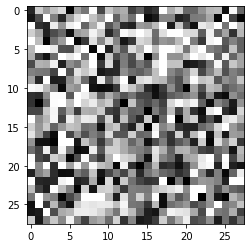

In [12]:
import numpy
import matplotlib.pyplot as plt

# all_images.shape
digit = all_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

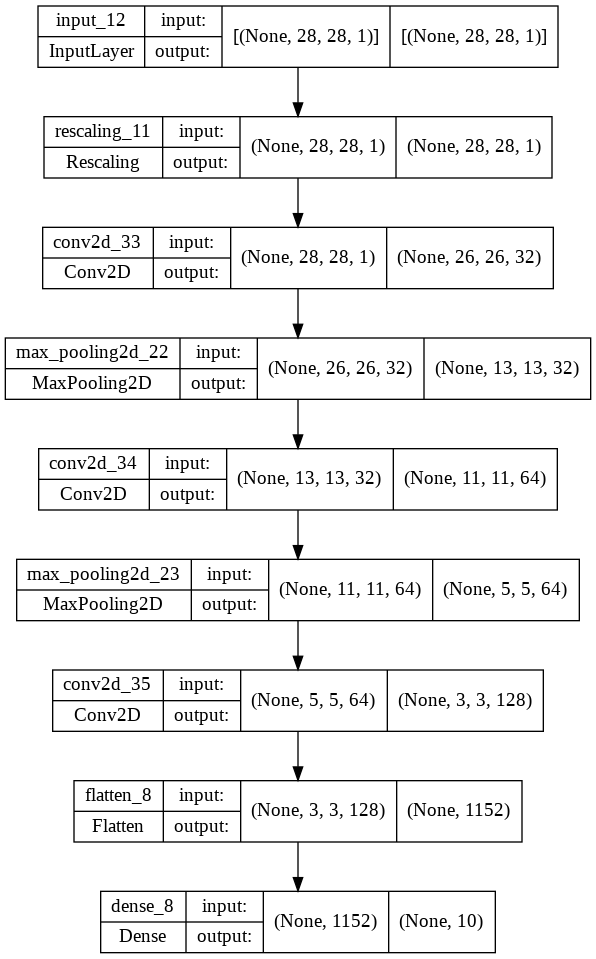

In [40]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Rescaling(1./255)(inputs)

# convolutional layers
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

keras.utils.plot_model(model, show_shapes=True)

In [41]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          batch_size=32)

# test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/10
938/938 [==============================] - 9s 9ms/step - loss: 1.9956 - accuracy: 0.2834 - val_loss: 1.8455 - val_accuracy: 0.3440
Epoch 2/10
938/938 [==============================] - 6s 7ms/step - loss: 1.5095 - accuracy: 0.4809 - val_loss: 1.3910 - val_accuracy: 0.5187
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 1.3183 - accuracy: 0.5510 - val_loss: 1.2997 - val_accuracy: 0.5573
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 1.2145 - accuracy: 0.5886 - val_loss: 1.3102 - val_accuracy: 0.5644
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 1.1433 - accuracy: 0.6111 - val_loss: 1.2163 - val_accuracy: 0.6008
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 1.0857 - accuracy: 0.6300 - val_loss: 1.1242 - val_accuracy: 0.6185
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 1.0386 - accuracy: 0.6463 - val_loss: 1.1108 - val_accuracy: 0.6223
Epoch 

In [42]:
# history data
history_dict = history.history

# training metric history
train_loss_values = history_dict["loss"]
train_acc_values = history_dict["accuracy"]

# validation metric history
val_loss_values = history_dict["val_loss"]
val_acc_values = history_dict["val_accuracy"]

# epochs
epochs = range(1, len(train_loss_values) + 1)

In [43]:
# history data
history_dict = history.history

# training metric history
train_loss_values = history_dict["loss"]
train_acc_values = history_dict["accuracy"]

# validation metric history
val_loss_values = history_dict["val_loss"]
val_acc_values = history_dict["val_accuracy"]

# epochs
epochs = range(1, len(train_loss_values) + 1)

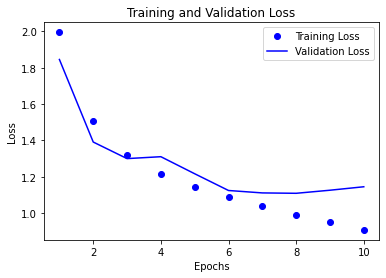

In [44]:
# create figure for training data
fig3, ax3 = plt.subplots()

# plot
ax3.plot(epochs, train_loss_values, "bo", label="Training Loss")
ax3.plot(epochs, val_loss_values, "b", label="Validation Loss")
ax3.set_title("Training and Validation Loss")
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Loss")
ax3.legend()
plt.show()

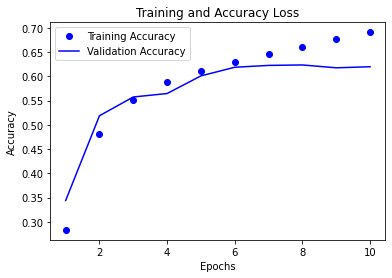

In [45]:
# create figure for training data
fig4, ax4 = plt.subplots()

# plot
ax4.plot(epochs, train_acc_values, "bo", label="Training Accuracy")
ax4.plot(epochs, val_acc_values, "b", label="Validation Accuracy")
ax4.set_title("Training and Accuracy Loss")
ax4.set_xlabel("Epochs")
ax4.set_ylabel("Accuracy")
ax4.legend()
plt.show()